### Capstone Project- IMAGE PROCESSING

In this Capstone Project task, I will use the MNIST database and use the Random Forest Classifier built into sklearn to create a classification model, and I will also be doing many other stuffs around this task as instructed.

As stated by the creators of the dataset, “The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalised and centred in a fixed-size image.”

Let's get started with importing all the libraries we are going to work with and load the dataset.

In [1]:
# Import the libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report

# Import libraries for visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.tree import export_graphviz, plot_tree
from IPython.display import Image
from subprocess import call

In [2]:
# Import the imnist dataset
import keras
from keras.datasets import mnist

# Load the dataset using load_data() function
mnist = mnist.load_data()

# We know the dataset is pre-splitted into train set and test set in it's original form
(X_train, y_train), (X_test, y_test) = mnist

# Let's check the shape and type of our sets just to confirm that we have right dataset
print("Shape of Training data:", X_train.shape, y_train.shape)
print("Type of Training data:", X_train.dtype, y_train.dtype)
print("Shape of Test data:", X_test.shape, y_test.shape)
print("Type of Test data:", X_test.dtype, y_test.dtype)

Shape of Training data: (60000, 28, 28) (60000,)
Type of Training data: uint8 uint8
Shape of Test data: (10000, 28, 28) (10000,)
Type of Test data: uint8 uint8


Let's have a look at how the sample images look like:

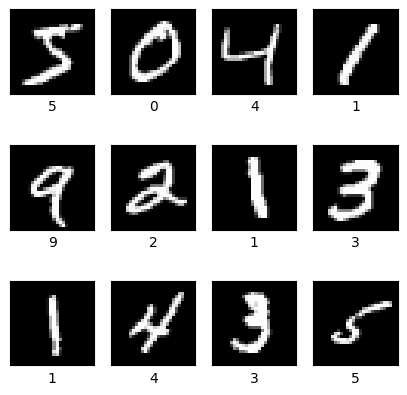

In [3]:
# Plot the 12 images in the training dataset
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(5, 5))
for i, axi in enumerate(ax.flat):
    axi.imshow(X_train[i], cmap='gray')
    axi.set(xticks=[], yticks=[], xlabel=y_train[i])

I'll now split the training data into training and development set.

In [4]:
# Split the training set into train set and development set
X_train_new, X_dev, y_train_new, y_dev = train_test_split(X_train, y_train, test_size=0.20, random_state=40)
print(X_train_new.shape)
print("Shape of the Development data:", X_dev.shape, y_dev.shape)
print("Type of Development data:", X_train.dtype, y_train.dtype)

(48000, 28, 28)
Shape of the Development data: (12000, 28, 28) (12000,)
Type of Development data: uint8 uint8


The three different sets as we have above, Training set, Development set and Test set are very useful to make a accurate and efficient machine learning model. Training set is used to train a model, based on which the model learns the patterns and generalise it to apply thsese on other data. Development set is used to validate the training outcomes and improve the model if there's room for the improvements, and for sure there's always room for improvements. The third held-out set is Test set which is used to evaluate the final performance of the model. The test set is the new and independent subset of the original data that the model has not/should not have seen before.
Basically these three subsets of the data ensures that the model learns well, and generalise the patterns and implement it well with new set of data.

In [5]:
# Reshape the train set and dev set into a 2D array
X_train_new = X_train_new.reshape(X_train_new.shape[0], -1)
X_dev = X_dev.reshape(X_dev.shape[0], -1)

# Create a random forest model
rf_classifier = RandomForestClassifier(random_state=7)

# Fit the train set to our model
rf_classifier.fit(X_train_new, y_train_new)

# Calculate the model's accuracy on dev set
rforest_accuracy = accuracy_score(y_dev, rf_classifier.predict(X_dev))

print(f"The accuracy of our random forest classifier is {rforest_accuracy}.")  

The accuracy of our random forest classifier is 0.96925.


Now I'll pick "n_estimators" parameter improve the performance of the model, which means I'll be trying to train and evaluate separate models with different n_estimators values. This parameter determines the number of trees that are going to be built in our random forest model. I choose this parameter to tune the model because the adequate use of this parameter can reduce the problem of overfitting or underfitting which will result in having more accurate and efficient model.

Effectively tuning this parameter will help us achive the best possible accuracy for our model.

I'm going to define the range of values for "n_estimators" and train and evaluate each model for all the values.

In [6]:
# Define the range for n_estimators
estimators_range = range(80, 300, 80)

# Train and evaluate random forest model for each value of n_estimator, we do this using for loop
best_accuracy = 0
best_estimators = None
for n_estimators in estimators_range:
    # Create a random forest model
    rf_classifier = RandomForestClassifier(n_estimators=n_estimators, random_state=7)

    # Fit the model on the train set
    rf_classifier.fit(X_train_new, y_train_new)

    # Calculate the model's accuracy on dev set
    accuracy = accuracy_score(y_dev, rf_classifier.predict(X_dev))

    # Using if statement to update best_accuracy with the best one, also record the n_estimators
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_estimators = n_estimators

# Print out the results
print(f"The best accuracy is {best_accuracy}.")
print(f"The optimum n_estimators value is {best_estimators}.")

The best accuracy is 0.96975.
The optimum n_estimators value is 160.


As we can observe the results above, while testing ranges of n_estimators value for the best accuracy, we achieved is 0.96975 when the value for n_estimators is 160. Now, I'm going to choose 160 as a value of the paramater for testing our model on the test data.

I'm going to train the final model on the whole of our original training set with optimum n_estimators value that we have and test the model on held-out test set we have.

In [7]:
# Train the final model on the full training set with the optimum n_estimators value we have
rf_classifier_final = RandomForestClassifier(n_estimators=best_estimators, random_state=7)

# Reshape the original train set and test set and into a 2D array
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Fit the train set to our model
rf_classifier_final.fit(X_train, y_train)

# Make prediction on the test set
y_pred = rf_classifier_final.predict(X_test)

# Calculate the model's accuracy on test set
rforest_accuracy_final = accuracy_score(y_test, y_pred)

print(f"The accuracy of our random forest classifier is {rforest_accuracy_final}.") 

The accuracy of our random forest classifier is 0.9694.


Let's print the confusion matrix for our random forest model on the test set and see what it has to tell us.

In [8]:
# Generate and print confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 969    0    1    0    0    2    3    1    4    0]
 [   0 1122    3    3    0    2    3    0    2    0]
 [   6    0  997    7    3    0    4    8    7    0]
 [   0    0   12  971    0    6    0   10    7    4]
 [   1    0    1    0  959    0    5    0    2   14]
 [   2    0    0   13    2  860    7    1    5    2]
 [   5    3    1    0    3    5  937    0    4    0]
 [   1    3   20    1    1    0    0  991    1   10]
 [   4    0    5    8    5    5    4    4  929   10]
 [   6    5    1   10   12    3    1    5    7  959]]


The above confusion matrix represents the multi-class classification problems. Each row indicates the actual class, and each column indicates the predicted class. The diagonal values indicates the number of samples that were accurately classified as the classes they belong, and the 0ff-diagonal values indicates that they were wrongfully classified into other classes.

As we can observe on the confusion matrix, we can say that the class 5 (i.e. 6th row/column) struggles the most with our model. It has the lowest number of instances of correct classification, and on the top of that, it also has the significantly high number of samples which are mis-classified. This particular class has accurately classified 860 instances, and mis-classified the total of 23 instances. The class number 1 seems to perform very well with the model having classified 1122 instances accurately.

In [10]:
# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and f1-score using a function classification_report
report = classification_report(y_test, y_pred)

# Print out the results
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.9694
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.96      1032
           3       0.96      0.96      0.96      1010
           4       0.97      0.98      0.98       982
           5       0.97      0.96      0.97       892
           6       0.97      0.98      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.96      0.95      0.96       974
           9       0.96      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



We have calculated the accuracy score, and used classification_report to calculate precision, recall and f1 score. The above results tell us a lot about our model's performance. As we can see, the weighted precision score, recall score and f1_score is roughly around 0.97 which is pretty decent. Our model having precision score of 0.97 simply means that 97% of instances are actually positive out of all instances that our model predicted as positive. 0.97 recall score tells us that our model was able to correctly identify 97% out of all acutal positive instances. F1-score of 0.97 simply tells our model performs with high precision and recall.

Accuracy score of approx 0.97 means that our random forest model is accurately predicting class labels with 97%b accuracy, or say the 97% of instances are correct prediction.